# **Biodiversity**

### **Importação dos Datasets**

Primeiramente, é necessário importar as bibliotecas que serão utilizadas durante o projeto. Na sequência, importei os dois conjuntos de dados que serão analisados.

In [1]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importando as bases de dados

df_s = pd.read_csv('species_info.csv')
df_o = pd.read_csv('observations.csv')

### **Inspeção dos dados**

Uma vez carregados os conjuntos de dados, pode-se partir para a inspeção dos dados de modo a conhecer quais são as variáveis envolvidas. 

O conjunto de dados contendo as informações a respeito das espécies encontra-se na tabela "df_s" e traz as colunas "category", "scientific_name", "common_names" e "conservation_status".

In [3]:
df_s.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
df_s.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


O conjunto de dados contendo as informações a respeito dos parques encontra-se na tabela "df_o" e traz as colunas "scientific_name", "park_name" e "observations".

In [5]:
df_o.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
df_o.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


#### **Características dos conjuntos de dados:**

São 4 os estados de conservação envolvidos.

In [7]:
print(f'número de estados de conservação: {df_s.conservation_status.nunique()}')
print(df_s.conservation_status.unique())

número de estados de conservação: 4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


São 7 o número de categorias envolvidas.

In [8]:
print(f'número de categorias: {df_s.category.nunique()}')
print(df_s.category.unique())

número de categorias: 7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


São 4 parques que fazem parte do conjunto de dados.

In [9]:
print(f'número de parques:{df_o.park_name.nunique()}')
print(df_o.park_name.unique())

número de parques:4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


O estado de conservação em maior número é o "Species of Concern". Também observa-se que há valores nulos (nan).

In [10]:
print(df_s.groupby('conservation_status').size())
print(f"estados de conservação:{df_s.conservation_status.unique()}")

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
estados de conservação:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


### **Modelagem dos dados**

Depois de inspecionar os conjuntos de dados e fazer algumas observações gerais a seu respeito, decidi investigar mais a fundo esses conjuntos de modo a analisar se havia valores nulos, linhas duplicadas e qualquer outra característica que pudesse atrapalhar minhas análises ou prejudicá-las.

"conservation_status" possui apenas 191 valores não-nulos, ou seja, 191 espécies que estão sob algum tipo de conservação. Todas as outras 5.633 espécies não estão sob qualquer tipo de conservação e, por essa razão, foi atribuído a essas espécies o valor de "No Intervention".

In [11]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [12]:
df_s.conservation_status.fillna('No Intervention', inplace=True)
df_s.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [13]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


O dataset df_o possui linhas duplicadas que optei por excluir.

In [14]:
df_o[df_o.duplicated()]

,scientific_name,park_name,observations
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
8710,Streptopelia decaocto,Yellowstone National Park,255
10038,Plantago major,Great Smoky Mountains National Park,90
10674,Arctium minus,Yosemite National Park,162
12381,Eleocharis palustris,Great Smoky Mountains National Park,62
13372,Hesperis matronalis,Bryce National Park,124
16741,Prunella vulgaris,Great Smoky Mountains National Park,75
17378,Potentilla norvegica,Yosemite National Park,148
17577,Spilogale putorius,Yellowstone National Park,256
18141,Poa compressa,Great Smoky Mountains National Park,80


In [15]:
df_o.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
df_s[df_s.duplicated()]

,category,scientific_name,common_names,conservation_status


In [17]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [18]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 545.8+ KB


### **Análise Exploratória**

Após ter modelado os conjuntos de dados de forma a possibilitar uma análise mais acurada dos dados, parti para a análise exploratória, onde busquei responder aos questionamentos iniciais a respeito desses dados.

**Status de conservação por categoria**

In [19]:
conservation_category = df_s.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Intervention,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


**Distribuição das categorias por estado de conservação**

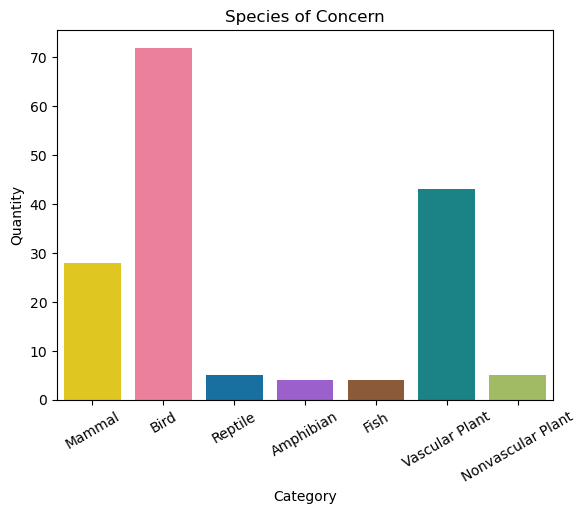

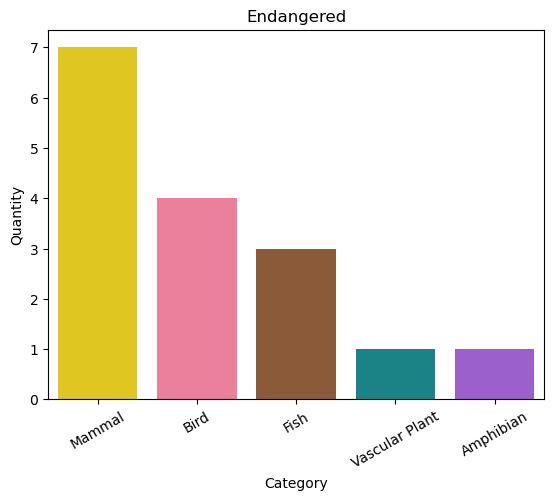

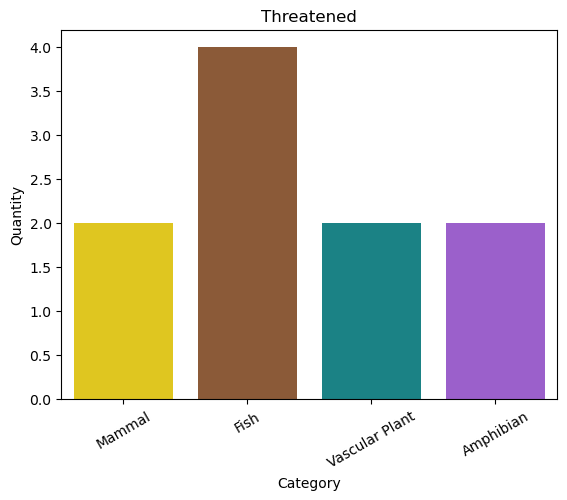

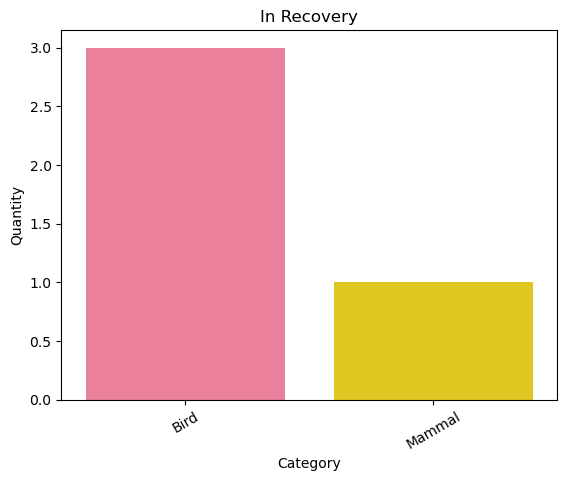

In [20]:
paleta={'Mammal':'#ffdd00', 'Bird':'#fb6f92', 'Reptile':'#0077b6', 'Amphibian':'#9d4edd', 'Fish':'#99582a', 'Vascular Plant':'#0a9396',\
        'Nonvascular Plant':'#a7c957' }

for status in df_s.conservation_status.unique():
    if status != 'No Intervention': 
        sns.countplot(data=df_s[df_s.conservation_status == status], x='category',\
                      palette=paleta
                     )
        plt.xticks(rotation=30)
        plt.title(status)
        plt.xlabel('Category')
        plt.ylabel('Quantity')
        plt.show()


**Análise da porcentagem de espécies, por categoria, com algum tipo de intervenção quanto ao seu estado de conservação**

Por meio dessa análise, observa-se que a categoria "Mammal" representa o maior número percentual de espécies protegidas.

In [21]:
df_s['is_protected'] = df_s.conservation_status != 'No Intervention'

category_counts = df_s.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts['percentage_protected'] = round((category_counts.protected\
                                                     / (category_counts.protected + category_counts.not_protected)) * 100, 2
                                                   )
category_counts.sort_values(by='percentage_protected', ascending=False)

,category,not_protected,protected,percentage_protected
3,Mammal,146,30,17.05
1,Bird,413,75,15.37
0,Amphibian,72,7,8.86
2,Fish,115,11,8.73
5,Reptile,73,5,6.41
4,Nonvascular Plant,328,5,1.50
6,Vascular Plant,4216,46,1.08


**Número de observações por parque**

In [22]:
df_o.groupby('park_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)

,park_name,observations
2,Yellowstone National Park,1442314
3,Yosemite National Park,862836
0,Bryce National Park,575901
1,Great Smoky Mountains National Park,431378


**Número de observações da categoria mais protegida por parque**

In [23]:
category_most_protected = category_counts[category_counts.percentage_protected == category_counts.percentage_protected.max()]
category_most_protected

,category,not_protected,protected,percentage_protected
3,Mammal,146,30,17.05


In [24]:
cat = category_most_protected.iloc[0, 0]
cat

'Mammal'

In [25]:
species_parks = df_o.merge(df_s)
species_parks.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False


In [26]:
parks_cat = species_parks[species_parks.category == cat][species_parks.is_protected == True]
parks_cat.head()

C:\Users\Zélia\AppData\Local\Temp\ipykernel_20308\2982796441.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parks_cat = species_parks[species_parks.category == cat][species_parks.is_protected == True]


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
1346,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True
1347,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True
1348,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True
1349,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True
4588,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True


In [27]:
observ_total = parks_cat.groupby(['park_name', 'category']).observations.sum().reset_index()
observ_total.rename(columns={'observations':'total_observations'}, inplace=True)
observ_total

,park_name,category,total_observations
0,Bryce National Park,Mammal,4701
1,Great Smoky Mountains National Park,Mammal,2951
2,Yellowstone National Park,Mammal,11030
3,Yosemite National Park,Mammal,6464


**Espécie da categoria mais protegida que é mais observada em cada parque**

In [28]:
observ_max = parks_cat.groupby(by='park_name').observations.max().reset_index()
observ_max

,park_name,observations
0,Bryce National Park,152
1,Great Smoky Mountains National Park,97
2,Yellowstone National Park,261
3,Yosemite National Park,169


In [29]:
parks = list(df_o.park_name.unique()) 

results = []
for park in parks:
    a = parks_cat[parks_cat.park_name == park]    
    a = a[a.observations == a.observations.max()]
    results.append(a)
    
df = pd.concat(results).reset_index(drop=True)
df

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Myotis californicus,Great Smoky Mountains National Park,97,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True
1,Myotis californicus,Great Smoky Mountains National Park,97,Mammal,California Myotis,Species of Concern,True
2,Myotis yumanensis,Yosemite National Park,169,Mammal,"Yuma Myotis, Yuma Myotis",Species of Concern,True
3,Myotis austroriparius,Bryce National Park,152,Mammal,"Mississippi Myotis, Southeastern Myotis",Species of Concern,True
4,Taxidea taxus,Yellowstone National Park,261,Mammal,"American Badger, Badger",Species of Concern,True
5,Taxidea taxus,Yellowstone National Park,261,Mammal,Badger,Species of Concern,True


Algumas linhas do dataset "df" estão duplicadas por causa da coluna "common_names". Como essa coluna não impacta no nome científico da espécie, optei por excluí-las.

In [30]:
df = df.drop([1, 5])
df

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Myotis californicus,Great Smoky Mountains National Park,97,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True
2,Myotis yumanensis,Yosemite National Park,169,Mammal,"Yuma Myotis, Yuma Myotis",Species of Concern,True
3,Myotis austroriparius,Bryce National Park,152,Mammal,"Mississippi Myotis, Southeastern Myotis",Species of Concern,True
4,Taxidea taxus,Yellowstone National Park,261,Mammal,"American Badger, Badger",Species of Concern,True


**Categorias avistadas por parque**

In [31]:
paleta={'Mammal':'#ffdd00', 'Bird':'#fb6f92', 'Reptile':'#0077b6', 'Amphibian':'#9d4edd', 'Fish':'#99582a', 'Vascular Plant':'#0a9396',\
        'Nonvascular Plant':'#a7c957' }

categories_by_park = species_parks.groupby(['park_name', 'category']).observations.sum().reset_index()
categories_by_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7542
1,Bryce National Park,Bird,58590
2,Bryce National Park,Fish,12823
3,Bryce National Park,Mammal,28830
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,8141
6,Bryce National Park,Vascular Plant,484125
7,Great Smoky Mountains National Park,Amphibian,5876
8,Great Smoky Mountains National Park,Bird,42869
9,Great Smoky Mountains National Park,Fish,9482


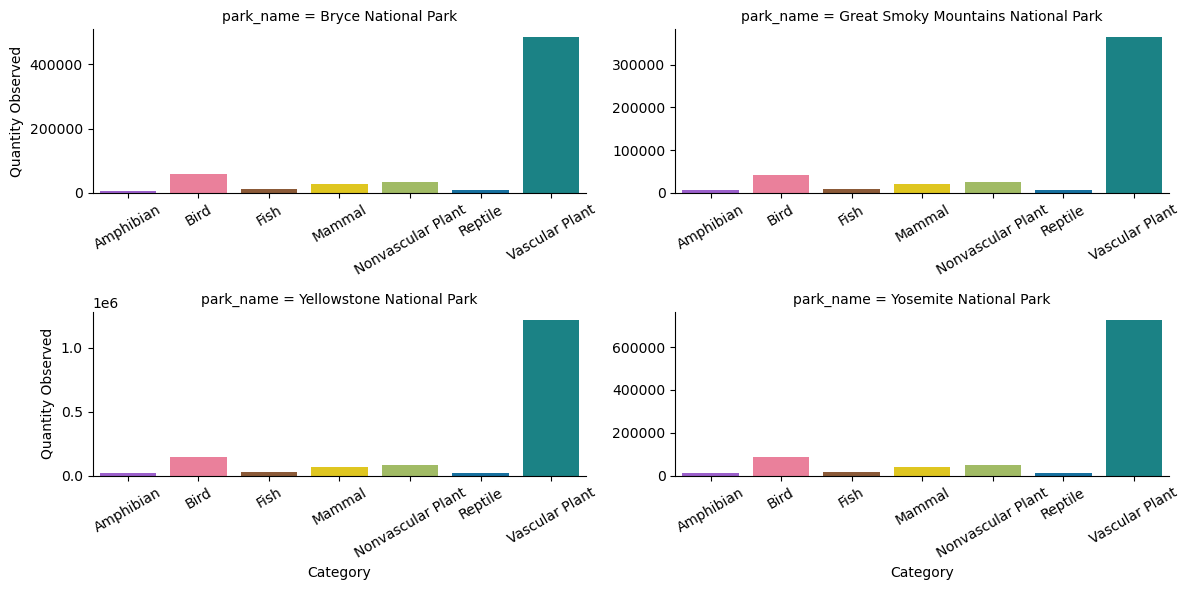

In [32]:

graph = sns.FacetGrid(categories_by_park, col="park_name", col_wrap=2,
                      hue = "category", sharey = False, sharex = False, palette=paleta, height=3, aspect=2)

for park in categories_by_park.park_name.unique():
    graph.map(sns.barplot, "category", "observations", palette=paleta, order = categories_by_park['category'].value_counts().index)
    graph.set_xticklabels(rotation=30)
    graph.set_axis_labels("Category", "Quantity Observed")

**Espécie mais avistada em cada parque**

In [33]:
parks = list(df_o.park_name.unique()) 

results = []
for park in parks:
    b = species_parks[species_parks.park_name == park]    
    b = b[b.observations == b.observations.max()]
    results.append(b)
    
df_2 = pd.concat(results).reset_index(drop=True)
df_2


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147,Vascular Plant,Spiny Sowthistle,No Intervention,False
1,Ivesia shockleyi var. shockleyi,Yosemite National Park,223,Vascular Plant,"Shockley's Ivesia, Sky Mousetail",No Intervention,False
2,Valerianella radiata,Bryce National Park,176,Vascular Plant,"Beaked Corn-Salad, Corn Salad",No Intervention,False
3,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",No Intervention,False
